<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## ***PART 2: Historic Weather Exploratory Data Analysis***

_Author: Devon Henry_

_Source: World Bank Group's [Climate Change Knowledge Portal](https://climateknowledgeportal.worldbank.org/)_ (CCKP). The CCKP provides global data on historical and future climate, vulnerabilities, and impacts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sktime
#from scipy.stats import zscore, ttest_1samp, ttest_ind, shapiro
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 20px; height: 40px">

#### There are a total of 34 countries (out of 36 locales, with Hawaii being counted separately from the US) for which I obtained historic weather data. I will be reading in a total of 68 separate dataframes prior to merging them all into one.

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 20px; height: 40px">

#### I didn't realize until much later in my cleaning process, but Tanzania had an extra row, due to the country being labeled, _'Tanzania, United Republic of.'_ The extra comma created a nameless column and shifted the correct data points to the right by one; the correct data was lost in the merge. I will need to take care of that extra column prior to merging:

In [2]:
# temperature dataframes:
BRA_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_BRA.csv')
BDI_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_BDI.csv')
CHN_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_CHN.csv')
COL_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_COL.csv')
CRI_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_CRI.csv')
CIV_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_CIV.csv')
ECU_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_ECU.csv')
SLV_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_SLV.csv')
ETH_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_ETH.csv')
GTM_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_GTM.csv')
HTI_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_HTI.csv')
HND_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_HND.csv')
IND_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_IND.csv')
IDN_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_IDN.csv')
JPN_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_JPN.csv')
KEN_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_KEN.csv')
LAO_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_LAO.csv')
MWI_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_MWI.csv')
MUS_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_MUS.csv')
MEX_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_MEX.csv')
MMR_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_MMR.csv')
NIC_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_NIC.csv')
PAN_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_PAN.csv')
PNG_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_PNG.csv')
PER_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_PER.csv')
PHL_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_PHL.csv')
RWA_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_RWA.csv')
TZA_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_TZA.csv')
THA_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_THA.csv')
UGA_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_UGA.csv')
USA_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_USA.csv')
PRI_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_PRI.csv')
VNM_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_VNM.csv')
ZMB_temp=pd.read_csv('./weather-data/temp/tas_1991_2016_ZMB.csv')

# rainfall (precip) dataframes:
BRA_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_BRA.csv')
BDI_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_BDI.csv')
CHN_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_CHN.csv')
COL_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_COL.csv')
CRI_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_CRI.csv')
CIV_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_CIV.csv')
ECU_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_ECU.csv')
SLV_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_SLV.csv')
ETH_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_ETH.csv')
GTM_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_GTM.csv')
HTI_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_HTI.csv')
HND_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_HND.csv')
IND_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_IND.csv')
IDN_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_IDN.csv')
JPN_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_JPN.csv')
KEN_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_KEN.csv')
LAO_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_LAO.csv')
MWI_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_MWI.csv')
MUS_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_MUS.csv')
MEX_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_MEX.csv')
MMR_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_MMR.csv')
NIC_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_NIC.csv')
PAN_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_PAN.csv')
PNG_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_PNG.csv')
PER_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_PER.csv')
PHL_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_PHL.csv')
RWA_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_RWA.csv')
TZA_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_TZA.csv')
THA_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_THA.csv')
UGA_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_UGA.csv')
USA_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_USA.csv')
PRI_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_PRI.csv')
VNM_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_VNM.csv')
ZMB_precip=pd.read_csv('./weather-data/precip/pr_1991_2016_ZMB.csv')

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>

#### Inspecting the dataframes:

In [3]:
BRA_precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall - (MM)  312 non-null    float64
 1    Year            312 non-null    int64  
 2    Statistics      312 non-null    object 
 3    Country         312 non-null    object 
 4    ISO3            312 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 12.3+ KB


In [4]:
BRA_precip.tail()

,Rainfall - (MM),Year,Statistics,Country,ISO3
307,54.0275,2016,Aug Average,Brazil,BRA
308,67.9271,2016,Sep Average,Brazil,BRA
309,129.9090,2016,Oct Average,Brazil,BRA
310,129.5640,2016,Nov Average,Brazil,BRA
311,197.2710,2016,Dec Average,Brazil,BRA


In [5]:
VNM_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  312 non-null    float64
 1    Year                    312 non-null    int64  
 2    Statistics              312 non-null    object 
 3    Country                 312 non-null    object 
 4    ISO3                    312 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 12.3+ KB


In [6]:
VNM_temp.tail()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
307,27.5726,2016,Aug Average,Vietnam,VNM
308,26.8327,2016,Sep Average,Vietnam,VNM
309,25.9795,2016,Oct Average,Vietnam,VNM
310,23.9791,2016,Nov Average,Vietnam,VNM
311,22.0834,2016,Dec Average,Vietnam,VNM


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>

#### Now, to deal with TZA_* dataframes:

In [7]:
TZA_temp.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [8]:
TZA_temp=TZA_temp.drop([' Country'],axis=1)

In [9]:
#TZA_temp=TZA_temp.index.copy(name=['Temperature - (Celsius)'])

In [10]:
TZA_temp.tail()

,Temperature - (Celsius),Year,Statistics,ISO3
21.7738,2016,Aug Average,Tanzania,TZA
22.7673,2016,Sep Average,Tanzania,TZA
24.1798,2016,Oct Average,Tanzania,TZA
24.2878,2016,Nov Average,Tanzania,TZA
24.4570,2016,Dec Average,Tanzania,TZA


In [11]:
TZA_temp=TZA_temp.rename(columns={' Statistics':' Country',' Year':' Statistics','Temperature - (Celsius)':' Year'})
TZA_temp=TZA_temp.rename_axis(index=['Temperature - (Celsius)'])

In [12]:
TZA_temp.reset_index(inplace=True)

In [13]:
TZA_temp.info()

'''Now, TZA_precip...'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  312 non-null    float64
 1    Year                    312 non-null    int64  
 2    Statistics              312 non-null    object 
 3    Country                 312 non-null    object 
 4    ISO3                    312 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 12.3+ KB


'Now, TZA_precip...'

In [14]:
TZA_precip.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 312 entries, 189.55 to 143.873
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rainfall - (MM)  312 non-null    int64 
 1    Year            312 non-null    object
 2    Statistics      312 non-null    object
 3    Country         312 non-null    object
 4    ISO3            312 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.6+ KB


In [15]:
TZA_precip.tail()

,Rainfall - (MM),Year,Statistics,Country,ISO3
7.18494,2016,Aug Average,Tanzania,United Republic of,TZA
15.73480,2016,Sep Average,Tanzania,United Republic of,TZA
19.02380,2016,Oct Average,Tanzania,United Republic of,TZA
67.36880,2016,Nov Average,Tanzania,United Republic of,TZA
143.87300,2016,Dec Average,Tanzania,United Republic of,TZA


In [16]:
TZA_precip=TZA_precip.drop([' Country'],axis=1)

In [17]:
TZA_precip=TZA_precip.rename(columns={' Statistics':' Country',' Year':' Statistics','Rainfall - (MM)':' Year'})

In [18]:
TZA_precip=TZA_precip.rename_axis(index=['Rainfall - (MM)'])

In [19]:
TZA_precip.reset_index(inplace=True)

In [20]:
TZA_precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall - (MM)  312 non-null    float64
 1    Year            312 non-null    int64  
 2    Statistics      312 non-null    object 
 3    Country         312 non-null    object 
 4    ISO3            312 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 12.3+ KB


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>
</br>

Well, that was a MASSIVE pain...

In [21]:
# I tested a few methods ('pd.merge', 'pd.join', 'pd.concat') for merging all the rainfall and temperature data, respectively...

test_precip=pd.concat([BRA_precip,VNM_precip])
test_precip[' ISO3']

0       BRA
1       BRA
2       BRA
3       BRA
4       BRA
       ... 
307     VNM
308     VNM
309     VNM
310     VNM
311     VNM
Name:  ISO3, Length: 624, dtype: object

In [22]:
temp=pd.concat([BRA_temp,BDI_temp,CHN_temp,COL_temp,CRI_temp,CIV_temp,ECU_temp,SLV_temp,ETH_temp,GTM_temp,HTI_temp,HND_temp,IND_temp,IDN_temp,JPN_temp,KEN_temp,LAO_temp,MWI_temp,MUS_temp,MEX_temp,MMR_temp,NIC_temp,PAN_temp,PNG_temp,PER_temp,PHL_temp,RWA_temp,TZA_temp,THA_temp,UGA_temp,USA_temp,PRI_temp,VNM_temp,ZMB_temp])
precip=pd.concat([BRA_precip,BDI_precip,CHN_precip,COL_precip,CRI_precip,CIV_precip,ECU_precip,SLV_precip,ETH_precip,GTM_precip,HTI_precip,HND_precip,IND_precip,IDN_precip,JPN_precip,KEN_precip,LAO_precip,MWI_precip,MUS_precip,MEX_precip,MMR_precip,NIC_precip,PAN_precip,PNG_precip,PER_precip,PHL_precip,RWA_precip,TZA_precip,THA_precip,UGA_precip,USA_precip,PRI_precip,VNM_precip,ZMB_precip])

# since both dataframes share the same number of data points, I'll go ahead and put ALL my weather data into a single frame...

In [23]:
#temp0.to_csv('./temp0')
#precip0.to_csv('./precip0')

'''^ I almost caved (GSheets)...'''

'^ I almost caved (GSheets)...'

In [24]:
wth=temp.merge(precip,how='right')
wth.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3',
       'Rainfall - (MM)'],
      dtype='object')

In [25]:
weather=wth[[' Year',' Statistics','Temperature - (Celsius)','Rainfall - (MM)',' Country']]

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10608 entries, 0 to 10607
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Year                    10608 non-null  int64  
 1    Statistics              10608 non-null  object 
 2   Temperature - (Celsius)  10608 non-null  float64
 3   Rainfall - (MM)          10608 non-null  float64
 4    Country                 10608 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 497.2+ KB


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>
</br>

#### I need to break up the _'Statistics'_ column to isolate the months from the extra text.  Then, I can join the new _'Month'_ column with the _'Year'_ column.

In [27]:
weather[' Statistics']=weather[' Statistics'].astype(str)
weather[['Month','...']]=weather[' Statistics'].str.split(expand=True)
weather.head()

<ipython-input-27-bb55f060b889>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather[' Statistics']=weather[' Statistics'].astype(str)


,Year,Statistics,Temperature - (Celsius),Rainfall - (MM),Country,Month,...
0,1991,Jan Average,25.6309,265.675,Brazil,Jan,Average
1,1991,Feb Average,25.9331,191.252,Brazil,Feb,Average
2,1991,Mar Average,25.6195,238.854,Brazil,Mar,Average
3,1991,Apr Average,25.3122,188.449,Brazil,Apr,Average
4,1991,May Average,24.6685,118.873,Brazil,May,Average


In [28]:
weather=weather.drop([' Statistics','...'],axis=1)
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10608 entries, 0 to 10607
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Year                    10608 non-null  int64  
 1   Temperature - (Celsius)  10608 non-null  float64
 2   Rainfall - (MM)          10608 non-null  float64
 3    Country                 10608 non-null  object 
 4   Month                    10608 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 497.2+ KB


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>
</br>

#### Now, I'll combine ' Year' with 'Month' and use the new 'datetime' column as the index.

In [29]:
weather[' Year']=weather[' Year'].astype(str)
weather['Month']=weather['Month'].astype(str)
weather['datetime']=weather[' Year'].str.cat(weather['Month'],sep='-')
weather.head(2)

,Year,Temperature - (Celsius),Rainfall - (MM),Country,Month,datetime
0,1991,25.6309,265.675,Brazil,Jan,1991-Jan
1,1991,25.9331,191.252,Brazil,Feb,1991-Feb


In [30]:
weather['datetime']=pd.to_datetime(weather['datetime'])

In [31]:
weather.sample(10)

,Year,Temperature - (Celsius),Rainfall - (MM),Country,Month,datetime
9529,2005,-2.1640,43.29150,United States,Feb,2005-02-01
1361,2000,24.6066,393.55100,Costa Rica,Jun,2000-06-01
8568,2003,24.0021,137.88100,Tanzania,Jan,2003-01-01
9346,2015,23.0432,211.07800,Uganda,Nov,2015-11-01
6194,2013,19.1893,7.42908,Mexico,Mar,2013-03-01
1255,1991,24.7808,406.21000,Costa Rica,Aug,1991-08-01
6886,1992,24.5560,156.89000,Panama,Nov,1992-11-01
9500,2002,15.7058,66.34700,United States,Sep,2002-09-01
7507,1992,18.7599,108.34200,Peru,Aug,1992-08-01
5789,2005,21.1999,145.61100,Mauritius,Jun,2005-06-01


In [32]:
# I'm going to assume that defaulting to the first of each month in the 'datetime' column won't create any biases...
# I'm not sure whether or not I should have used 'Year' and 'Month' as MultiIndexes. But, I don't think it will matter much for my needs...
weather=weather.drop([' Year','Month'],axis=1)

In [33]:
weather.set_index('datetime',inplace=True)

In [34]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10608 entries, 1991-01-01 to 2016-12-01
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  10608 non-null  float64
 1   Rainfall - (MM)          10608 non-null  float64
 2    Country                 10608 non-null  object 
dtypes: float64(2), object(1)
memory usage: 331.5+ KB


In [35]:
#weather.to_csv('./weather-data/weather.csv')

'''A PROPERLY formatted .csv file (come on, World Bank Group...)!'''

'A PROPERLY formatted .csv file (come on, World Bank Group...)!'

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 10px; height: 27.5px">

#### ***CHECKPOINT: RE-RUN NOTEBOOK FROM HERE***


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sktime

weather=pd.read_csv('./weather-data/weather.csv')
weather.sample(10)

,datetime,Temperature - (Celsius),Rainfall - (MM),Country
9956,2014-09-01,26.85020,295.70400,Puerto Rico
8335,2009-08-01,20.98920,0.99859,Rwanda
5115,2001-04-01,27.20120,39.93690,Laos
4930,2011-11-01,24.98620,113.54700,Kenya
1244,2016-09-01,25.08040,233.82600,Colombia
3468,1994-01-01,21.83140,97.99540,Honduras
2830,1992-11-01,22.86590,196.41700,Guatemala
9549,2006-10-01,8.07728,62.79330,United States
5752,2002-05-01,22.90180,122.06500,Mauritius
4177,2001-02-01,26.02980,260.36300,Indonesia


In [37]:
country=weather.set_index(' Country','datetime')
country.head()

,datetime,Temperature - (Celsius),Rainfall - (MM)
Country,,,
Brazil,1991-01-01,25.6309,265.675
Brazil,1991-02-01,25.9331,191.252
Brazil,1991-03-01,25.6195,238.854
Brazil,1991-04-01,25.3122,188.449
Brazil,1991-05-01,24.6685,118.873


In [38]:
country['datetime']=pd.to_datetime(country['datetime'])
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10608 entries,  Brazil to  Zambia
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   datetime                 10608 non-null  datetime64[ns]
 1   Temperature - (Celsius)  10608 non-null  float64       
 2   Rainfall - (MM)          10608 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 331.5+ KB


In [39]:
cou_dt=country.sort_index(axis=1)
cou_dt.head(24)

,Rainfall - (MM),Temperature - (Celsius),datetime
Country,,,
Brazil,265.6750,25.6309,1991-01-01
Brazil,191.2520,25.9331,1991-02-01
Brazil,238.8540,25.6195,1991-03-01
Brazil,188.4490,25.3122,1991-04-01
Brazil,118.8730,24.6685,1991-05-01
Brazil,84.7695,23.9559,1991-06-01
Brazil,66.6732,23.2381,1991-07-01
Brazil,48.6990,23.9559,1991-08-01
Brazil,70.8228,25.2297,1991-09-01


In [40]:
co_dt=cou_dt.groupby('datetime',as_index=False)

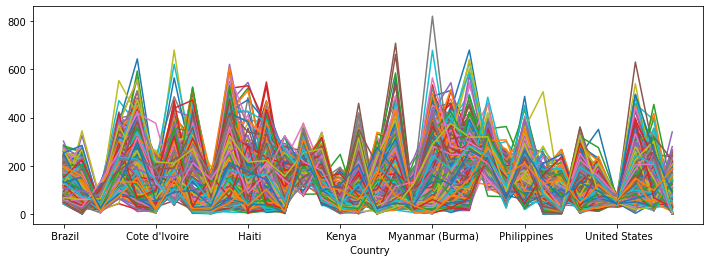

In [41]:
co_dt['Rainfall - (MM)'].plot(figsize=(12,4));

In [42]:
weather['datetime']=pd.to_datetime(weather['datetime'])

In [43]:
weather.set_index('datetime',inplace=True)

In [44]:
weather.sort_index(inplace=True)
weather.head()

,Temperature - (Celsius),Rainfall - (MM),Country
datetime,,,
1991-01-01,25.6309,265.67500,Brazil
1991-01-01,25.1747,8.14374,Thailand
1991-01-01,23.2964,189.55000,Tanzania
1991-01-01,18.9343,94.85040,Rwanda
1991-01-01,24.9838,84.37060,Philippines


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>
</br>

Let's get started with some real analyses:

In [45]:
# testing ways of summarizing by year and country...

test00=weather.loc['2000'].groupby(' Country')
test00.head()

,Temperature - (Celsius),Rainfall - (MM),Country
datetime,,,
2000-01-01,16.2229,10.14180,Mexico
2000-01-01,22.4672,8.10457,El Salvador
2000-01-01,25.3629,443.07500,Mauritius
2000-01-01,24.5514,14.75560,Kenya
2000-01-01,25.0684,163.77700,Philippines
...,...,...,...
2000-05-01,22.9389,38.07310,Tanzania
2000-05-01,14.4907,58.85610,China
2000-05-01,12.8646,54.20210,United States


In [46]:
test_temp00=test00['Temperature - (Celsius)'].describe()
test_temp00.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [47]:
test_temp00['mean']

 Country
 Brazil              25.191808
 Burundi             20.838142
 China                6.737518
 Colombia            24.198742
 Costa Rica          24.539783
 Cote d'Ivoire       26.512033
 Ecuador             21.070667
 El Salvador         23.997517
 Ethiopia            22.930317
 Guatemala           23.568825
 Haiti               24.995950
 Honduras            23.611300
 India               24.475267
 Indonesia           26.152250
 Japan               11.375716
 Kenya               24.904750
 Laos                23.537192
 Malawi              22.113333
 Mauritius           22.783333
 Mexico              21.202517
 Myanmar (Burma)     22.882192
 Nicaragua           24.853967
 Panama              25.049367
 Papua New Guinea    24.926125
 Peru                19.548700
 Philippines         25.912025
 Puerto Rico         25.217767
 Rwanda              19.981325
 Tanzania            22.802192
 Thailand            26.371025
 Uganda              23.398375
 United States        7.496298

In [48]:
test91=weather.loc['1991'].groupby(' Country')
test_temp91=test91['Temperature - (Celsius)'].describe()
test_rain91=test91['Rainfall - (MM)'].describe()

In [49]:
print('_________________________________________________________\n\n* * * Minimum Temperature (°C) per Country in 1991 * * *\n_________________________________________________________\n')
print(test_temp91['min'])

_________________________________________________________

* * * Minimum Temperature (°C) per Country in 1991 * * *
_________________________________________________________

 Country
 Brazil              23.2381
 Burundi             19.3619
 China               -8.0581
 Colombia            23.6642
 Costa Rica          23.4919
 Cote d'Ivoire       24.7612
 Ecuador             20.5462
 El Salvador         22.4650
 Ethiopia            20.8477
 Guatemala           21.6561
 Haiti               23.2447
 Honduras            22.1057
 India               16.6354
 Indonesia           25.7928
 Japan               -0.2434
 Kenya               22.9982
 Laos                19.9251
 Malawi              18.1263
 Mauritius           19.7288
 Mexico              15.3059
 Myanmar (Burma)     18.2303
 Nicaragua           23.6108
 Panama              24.4650
 Papua New Guinea    24.2804
 Peru                18.2142
 Philippines         24.6773
 Puerto Rico         23.6675
 Rwanda              18.7801
 Tan

In [50]:
print('______________________________________________________\n\n* * * Average Rainfall (mm) per Country in 1991 * * *\n______________________________________________________\n')
print(test_rain91['mean'])

______________________________________________________

* * * Average Rainfall (mm) per Country in 1991 * * *
______________________________________________________

 Country
 Brazil              138.706558
 Burundi             102.481330
 China                47.203383
 Colombia            179.841150
 Costa Rica          239.987192
 Cote d'Ivoire       104.227491
 Ecuador             134.924567
 El Salvador         128.055490
 Ethiopia             61.461242
 Guatemala           193.302450
 Haiti                73.013372
 Honduras            140.331175
 India                84.803275
 Indonesia           204.429817
 Japan               148.543792
 Kenya                49.673483
 Laos                135.616772
 Malawi               88.320280
 Mauritius           137.654325
 Mexico               61.763097
 Myanmar (Burma)     166.128748
 Nicaragua           175.738633
 Panama              202.801533
 Papua New Guinea    240.229083
 Peru                107.090483
 Philippines         168.

In [51]:
weather.loc['2001'].groupby(' Country').mean()

,Temperature - (Celsius),Rainfall - (MM)
Country,,
Brazil,25.468083,148.095058
Burundi,21.045625,115.000342
China,7.096742,45.832000
Colombia,24.617692,203.554308
Costa Rica,25.036600,223.364125
Cote d'Ivoire,26.651908,118.886417
Ecuador,21.240183,144.456417
El Salvador,24.411475,155.131382
Ethiopia,23.043467,63.033925


<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>

#### After some EDA with different groupings and stats, I decided to create a new dataframe with average metrics for each country for each year. I should be able to compare this more directly with my coffee data...

In [52]:
wth93=weather.loc['1993'].groupby(' Country').mean()
wth94=weather.loc['1994'].groupby(' Country').mean()
wth95=weather.loc['1995'].groupby(' Country').mean()
wth96=weather.loc['1996'].groupby(' Country').mean()
wth97=weather.loc['1997'].groupby(' Country').mean()
wth98=weather.loc['1998'].groupby(' Country').mean()
wth99=weather.loc['1999'].groupby(' Country').mean()
wth00=weather.loc['2000'].groupby(' Country').mean()
wth01=weather.loc['2001'].groupby(' Country').mean()
wth02=weather.loc['2002'].groupby(' Country').mean()
wth03=weather.loc['2003'].groupby(' Country').mean()
wth04=weather.loc['2004'].groupby(' Country').mean()
wth05=weather.loc['2005'].groupby(' Country').mean()
wth06=weather.loc['2006'].groupby(' Country').mean()
wth07=weather.loc['2007'].groupby(' Country').mean()
wth08=weather.loc['2008'].groupby(' Country').mean()
wth09=weather.loc['2009'].groupby(' Country').mean()
wth10=weather.loc['2010'].groupby(' Country').mean()
wth11=weather.loc['2011'].groupby(' Country').mean()
wth12=weather.loc['2012'].groupby(' Country').mean()
wth13=weather.loc['2013'].groupby(' Country').mean()
wth14=weather.loc['2014'].groupby(' Country').mean()
wth15=weather.loc['2015'].groupby(' Country').mean()
wth16=weather.loc['2016'].groupby(' Country').mean()

In [53]:
wea15=wth15.reset_index()
wea15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Country                 34 non-null     object 
 1   Temperature - (Celsius)  34 non-null     float64
 2   Rainfall - (MM)          34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [54]:
co=weather.reset_index(inplace=False)

In [55]:
co=co.set_index(' Country',inplace=False)
co.head()

,datetime,Temperature - (Celsius),Rainfall - (MM)
Country,,,
Brazil,1991-01-01,25.6309,265.67500
Thailand,1991-01-01,25.1747,8.14374
Tanzania,1991-01-01,23.2964,189.55000
Rwanda,1991-01-01,18.9343,94.85040
Philippines,1991-01-01,24.9838,84.37060


In [56]:
co_dt=co.groupby('datetime')

In [57]:
#co_dt.loc['2001'].describe()

AttributeError: 'DataFrameGroupBy' object has no attribute 'loc'

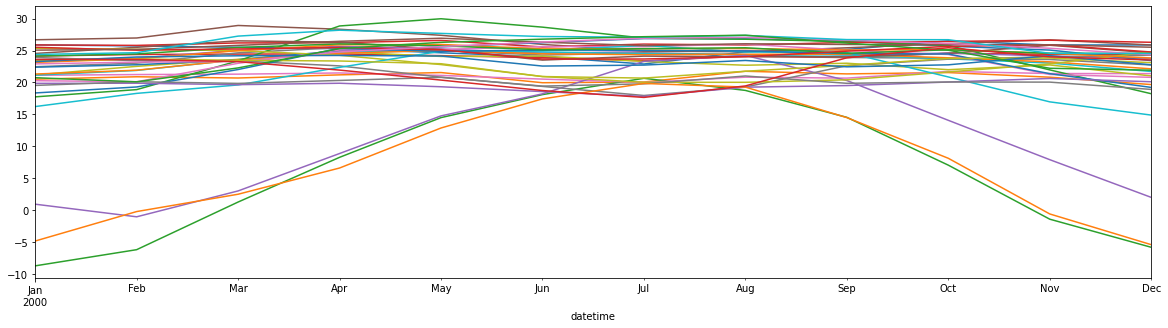

In [58]:
# This is cool, but I need numbers to go along with this. There are a few ouitliers, it seems, but overall temperature looks relatively predictive across the board.

test00['Temperature - (Celsius)'].plot(figsize=(20,5));

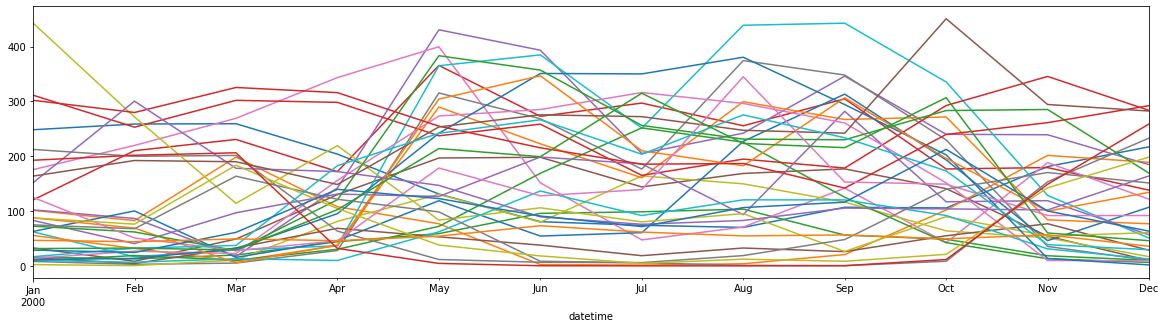

In [59]:
# Rainfall, much less so...

test00['Rainfall - (MM)'].plot(figsize=(20,5));

In [ ]:
weather['Temperature - (Celsius)'].plot(figsize=(20,5));

In [ ]:
weather['Rainfall - (MM)'].plot(figsize=(20,5));

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>
</br>

#### _Temperature_ looks largely cyclical with incremental YOY increase in the average temperature, as one would expect. 

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>
</br>

#### I'd like to compare the slope of average temperature increase with the slope of average coffee bean flavor metric decrease. I believe there to be a correlation between the two.

<img src='https://black-jack1.s3.amazonaws.com/GA/lightbulb.png' style="float: left; margin: 30px; height: 60px">
</br>
</br>

#### _Rainfall_ appears to reset more over the course of time.  I'd have to dig deeper to recognize specific trends.